# Projeto 1 - Ciência dos Dados

Nome: Fernando Fincatti

## Pergunta (s) a ser respondida

Pergunta: O fato dos países se juntarem a APEC faz com que o PIB cresça e diminua, consequentemente, o índice de probreza?

## Explicação da hipótese e mecanismo

APEC é uma organização que tem por objetivo proporcionar o crescimento econômico dos países da região Ásia-Pacífico, através de uma área de livre comércio entre os países membros. Desde modo é esperado que o Chile, membro da APEC, apresente melhorias nos indicadores de economia e nos derivados do mesmo ao decorrer dos anos.

## Bases de dados usadas

Os dados foram retirados dos seguintes sites:

    
https://data.worldbank.org/
https://www.gapminder.org/tools/

## Primeira etapa

Nessa primeira etapa do projeto, analisaremos o índice de pobreza dos países da APEC e compararemos com a média mundial.

In [1]:
#importando as bibliotecas necessárias
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import os
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Fernando\Documents\2° semestre\Ciência dos dados\Ci-ncia-dos-dados


In [3]:
#importanto o excel

poverty = pd.read_excel('poverty.xls', sheet_name="Data", skiprows=3)



In [4]:
#transformando a tabela

poverty1= poverty.set_index('Country')


In [5]:
#vamos selecionar os países da APEC e uma série temporal de 1997 até 2017.
#fazendo isso, poderemos calcular uma média entre os países da APEC durantes essa série temporal.

APEC = ['Chile','Mexico','Peru','Thailand','Canada','Philippines','Indonesia','Australia']
poverty1.loc[:,"APEC"] = "não"


In [6]:
#colocando sim em todos os países que são da APEC
poverty1.loc[APEC, "APEC"] = "sim"

In [7]:
#Vamos criar a tabela filtradas do grupo APEC de 1997 até 2017

grupo_APEC = poverty1.loc[poverty1.APEC == 'sim']
grupo_APEC_foc = grupo_APEC[grupo_APEC.columns[37:58]]
grupo_APEC_foc_transpose = grupo_APEC_foc.transpose()
grupo_APEC_serie = grupo_APEC_foc_transpose
grupo_APEC_serie_tranpose = grupo_APEC_serie.transpose()


In [8]:
#calculando a média anual dos países no bloco
media_poverty_APEC = pd.Series(grupo_APEC_serie.transpose().mean())


Agora que temos uma média anual dos países da APEC, precisamos de um grupo controle, ou seja, países fora do bloco que possam servir de comparação. O critério de seleção para estes países é primeiramente regional, ou seja, países que compartilham a mesma região do grupo selecionado da APEC. Em caso de não haver nenhum país próximo que não pertença ao grupo, será ultilizado uma tabela dos rankings das economias mundiais, e será escolhido países comparáveis.

In [9]:
#vamos selecionar outros 8 países, e criar sua tabela
fora_APEC = ["Ecuador","Egypt, Arab Rep.","United States","Netherlands","Belgium","Pakistan"]
fora_APEC1 = poverty1.loc[fora_APEC]
fora_APEC_foc = fora_APEC1[fora_APEC1.columns[37:58]]
fora_APEC_foc_transpose = fora_APEC_foc.transpose()
fora_APEC_serie = fora_APEC_foc_transpose
fora_APEC_serie_transpose = fora_APEC_serie.transpose()


In [10]:
#Criando lista do Chile para plotar um gráfico de Poverty x Tempo

media_poverty_fora_APEC = pd.Series(fora_APEC_serie.transpose().mean())


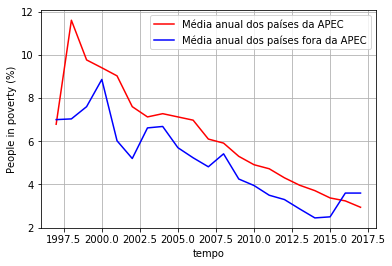

In [11]:
#Criando uma lista de tempo para ser usada no gráfico
tempo = np.arange(1997,2018)

#plotando a média anual dos países pelos dados obtidos do Chile
plt.plot(tempo, media_poverty_APEC,'red', label="Média anual dos países da APEC")
plt.plot(tempo, media_poverty_fora_APEC, 'blue', label="Média anual dos países fora da APEC")
plt.xlabel("tempo")
plt.ylabel("People in poverty (%)")
plt.legend()
plt.grid(True)
plt.show()


## Segunda etapa

Nessa segunda etapa do projeto, analisaremos o GDP dos países da APEC e compararemos com a média mundial

In [12]:
#importanto o excel

gdp = pd.read_excel("gdp.xls",  sheet_name="Data", skiprows=3)

In [13]:
#transformando a tebela

gdp1= gdp.set_index('Country')

In [14]:
#vamos selecionar os países da APEC e uma série temporal de 1997 até 2017.
#fazendo isso, poderemos calcular uma média entre os países da APEC durantes essa série temporal.

gdp1.loc[:,"APEC"] = "não"

In [15]:
#colocando sim em todos os países que são da APEC

gdp1.loc[APEC, "APEC"] = "sim"

In [16]:
#Vamos criar a tabela filtrada do grupo APEC de 1997 até 2017

grupo_APEC_gdp = gdp1.loc[poverty1.APEC == 'sim']
grupo_APEC_foc_gdp = grupo_APEC_gdp[grupo_APEC.columns[37:58]]
grupo_APEC_foc_transpose_gdp = grupo_APEC_foc_gdp.transpose()
grupo_APEC_serie_gdp = grupo_APEC_foc_transpose_gdp
grupo_APEC_serie_tranpose_gdp = grupo_APEC_serie_gdp.transpose()

In [17]:
#calculando a média anual para a APEC

media_gdp_APEC = pd.Series(grupo_APEC_serie_gdp.transpose().mean())

In [18]:
#vamos selecionar outros 8 países, e criar sua tabela

fora_APEC_gdp = ["Ecuador","Egypt, Arab Rep.","United States","Netherlands","Belgium","Pakistan"]
fora_APEC1_gdp = gdp1.loc[fora_APEC_gdp]
fora_APEC_foc_gdp = fora_APEC1_gdp[fora_APEC1.columns[37:58]]
fora_APEC_foc_transpose_gdp = fora_APEC_foc_gdp.transpose()
fora_APEC_serie_gdp = fora_APEC_foc_transpose_gdp
fora_APEC_serie_transpose_gdp = fora_APEC_serie_gdp.transpose()



In [19]:
#calculando a média anual para países fora da APEC

media_gdp_fora_APEC = pd.Series(fora_APEC_serie_gdp.transpose().mean())

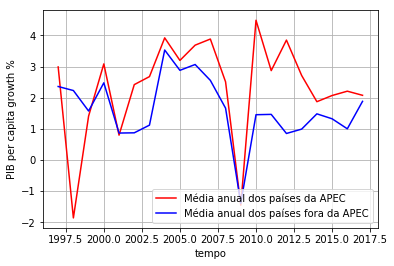

In [20]:
#Criando uma lista de tempo para ser usada no gráfico

tempo = np.arange(1997,2018)

#plotando a média anual dos países pelos dados obtidos do Chile

plt.plot(tempo, media_gdp_APEC,'red', label="Média anual dos países da APEC")
plt.plot(tempo, media_gdp_fora_APEC, 'blue', label="Média anual dos países fora da APEC")
plt.xlabel("tempo")
plt.ylabel("PIB per capita growth %")
plt.legend()
plt.grid(True)
plt.show()

## Para um dado ano ##

In [38]:
#Vamos fazer uma tabela especial para GDP, utilizando os dois indicadore e selecionando apenas o ano de 2000

gdp_2000 = gdp1.loc[:, '2000'].to_frame()
gdp_2000.loc[:,"APEC"] = 'não'
gdp_2000.loc[APEC, "APEC"] = 'sim'
y = gdp_2000.loc[gdp_2000.APEC=="sim"]
y1 = gdp_2000.loc[gdp_2000.APEC=="não"]


In [39]:
#Vamos fazer uma tabela especial para poverty, utilizando os dois indicadore e selecionando apenas o ano de 2000

poverty_2000 = poverty1.loc[:, '2000'].to_frame()
poverty_2000.loc[:,"APEC"] = 'não'
poverty_2000.loc[APEC, "APEC"] = 'sim'
w = poverty_2000.loc[poverty_2000.APEC=="sim"]
w1 = poverty_2000.loc[poverty_2000.APEC=="não"]

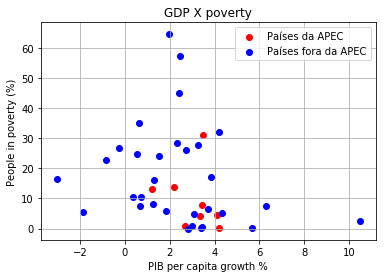

In [40]:
#Plotando o gráfico de GDP por poverty

plt.scatter(y.loc[:, "2000"], w.loc[:, "2000"], color="r", label="Países da APEC")
plt.scatter(y1.loc[:, "2000"], w1.loc[:, "2000"], color="b", label="Países fora da APEC")
plt.xlabel("PIB per capita growth %")
plt.ylabel("People in poverty (%)")
plt.legend()
plt.title("GDP X poverty")
plt.grid(True)

In [47]:
def reta(dados_x, dados_y, c):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()

    print('Ajuste linear entre X3 e X4:')
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)
    plt.scatter(dados_x, dados_y, c=c, alpha=0.8)
    plt.title('GDP X poverty')
    plt.xlabel('PIB per capita growth %')
    plt.ylabel('People in poverty (%)')

    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color=c)

    plt.tight_layout()

Ajuste linear entre X3 e X4:
Coeficiente linear: 16.462225408867344
Coeficiente angular: -2.2881949236904826
Ajuste linear entre X3 e X4:
Coeficiente linear: 19.47989378531807
Coeficiente angular: -0.6575748539726551


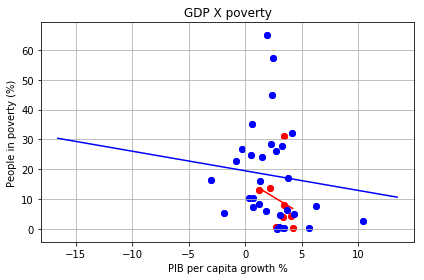

In [48]:
plt.scatter(y.loc[:, "2000"], w.loc[:, "2000"], color="r")
reta(y.loc[:, "2000"], w.loc[:, "2000"], "r")
plt.scatter(y1.loc[:, "2000"], w1.loc[:, "2000"], color="b")
reta(y1.loc[:, "2000"], w1.loc[:, "2000"], "b")
plt.title("GDP X poverty")
plt.grid(True)

Agora que plotamos o primeiro, vamos fazer o mesmo processo para outro ano e comparar os resultados

In [43]:
gdp_2010 = gdp1.loc[:, '2010'].to_frame()
gdp_2010.loc[:,"APEC"] = 'não'
gdp_2010.loc[APEC, "APEC"] = 'sim'
yy = gdp_2010.loc[gdp_2010.APEC=="sim"]
yy1 = gdp_2010.loc[gdp_2010.APEC=="não"]

In [44]:
poverty_2010 = poverty1.loc[:, '2010'].to_frame()
poverty_2010.loc[:,"APEC"] = 'não'
poverty_2010.loc[APEC, "APEC"] = 'sim'
ww = poverty_2010.loc[poverty_2010.APEC=="sim"]
ww1 = poverty_2010.loc[poverty_2010.APEC=="não"]

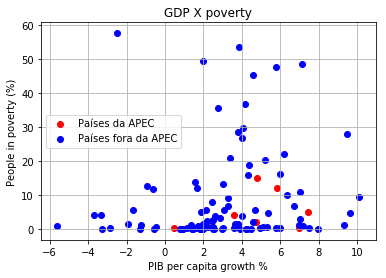

In [50]:
plt.scatter(yy.loc[:, "2010"], ww.loc[:, "2010"], color="r", label="Países da APEC")
plt.scatter(yy1.loc[:, "2010"], ww1.loc[:, "2010"], color="b", label="Países fora da APEC")
plt.xlabel("PIB per capita growth %")
plt.ylabel("People in poverty (%)")
plt.legend()
plt.title("GDP X poverty")
plt.grid(True)

Ajuste linear entre X3 e X4:
Coeficiente linear: 1.3655602869238663
Coeficiente angular: 0.7901328624015528
Ajuste linear entre X3 e X4:
Coeficiente linear: 7.496914571668437
Coeficiente angular: 0.41403292086710736


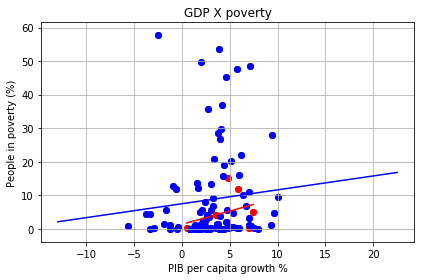

In [51]:
plt.scatter(yy.loc[:, "2010"], ww.loc[:, "2010"], color="r")
reta(yy.loc[:, "2010"], ww.loc[:, "2010"], "r")
plt.scatter(yy1.loc[:, "2010"], ww1.loc[:, "2010"], color="b")
reta(yy1.loc[:, "2010"], ww1.loc[:, "2010"], "b")
plt.title("GDP X poverty")
plt.grid(True)

## Conclusão

A partir dos gráficos analisados acima, podemos tirar algumas conclusões a respeito da APEC nos países. Ao comparar o dois anos 2000 e 2010, podemos ver quem os coeficiente angular da reta 